In [14]:
using EvoTrees
using XLSX
using Plots
using Random
using Statistics
using Interpolations

include(chop(@__DIR__; tail = 5)*"/plotting.jl")

xf = XLSX.readxlsx(chop(@__DIR__; tail = 5)*"data/Concrete_Data.xlsx");
data = Float64.(xf["Sheet1"]["A2:I1031"]);

Random.seed!(1)
data = data[shuffle(1:end), :]

train_split::Int = floor(0.75 * length(data[:, 1]))

x_train = data[1:train_split, 1:8];
y_train = data[1:train_split, 9];

x_test = data[train_split+1:end, 1:8];
y_test = data[train_split+1:end, 9];

In [17]:
trees = [100, 250, 500, 750, 1000, 1500, 2000]
depths = [3, 4, 5, 6, 7, 9]
bins = [8, 32, 128, 255]

r2_vals = Array{Any}(undef, length(bins))

for bin in eachindex(bins)

    r2_values_test = Matrix{Float64}(undef, length(trees), length(depths))

    for depth in eachindex(depths)

        config = EvoTreeRegressor(nrounds=maximum(trees), max_depth=depths[depth], nbins=bins[bin]);
        model = fit_evotree(config; x_train, y_train);

        for n_trees in eachindex(trees)

            pred_train = EvoTrees.predict(model, x_train, ntree_limit=trees[n_trees])
            pred_test = EvoTrees.predict(model, x_test, ntree_limit=trees[n_trees])
        
            nrmse_train = sqrt(mean((y_train .- pred_train).^2)) / mean(y_train)
            nrmse_test = sqrt(mean((y_test .- pred_test).^2)) / mean(y_test)
        
            r2_score_train = 1 - sum((y_train .- pred_train).^2) / sum((y_train .- mean(y_train)).^2)
            r2_score_test = 1 - sum((y_test .- pred_test).^2) / sum((y_test .- mean(y_test)).^2)
        
            r2_values_test[n_trees, depth] = r2_score_test
        
        end

    end

    r2_vals[bin] = r2_values_test

end

┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 3
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 8
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 4
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 8
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 5
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 8
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 6
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 8
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 7
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 8
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 9
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 8
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 3
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 32
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 4
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 32
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 5
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 32
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 6
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 32
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 7
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 32
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 9
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 32
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 3
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 128
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 4
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 128
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 5
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 128
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 6
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 128
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 7
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 128
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 9
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 128
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 3
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 255
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 4
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 255
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 5
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 255
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 6
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 255
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 7
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 255
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


┌ Info: EvoTreeRegressor{EvoTrees.Linear, Float32}
│  - nrounds: 2000
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 0.1
│  - max_depth: 9
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 255
│  - alpha: 0.5
│  - monotone_constraints: Dict{Int64, Int64}()
│  - rng: TaskLocalRNG()
│  - device: cpu
└ @ EvoTrees /Users/eetureijonen/.julia/packages/EvoTrees/eBGfO/src/fit.jl:323


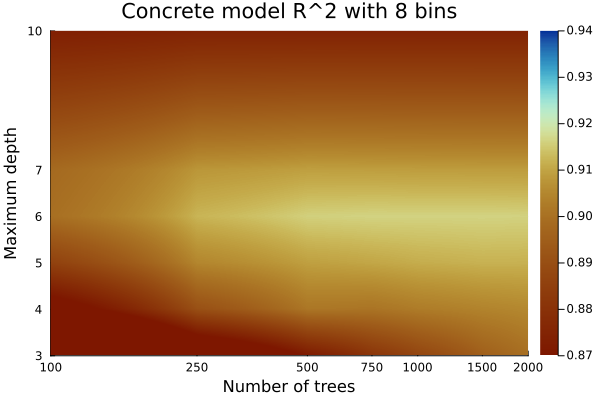

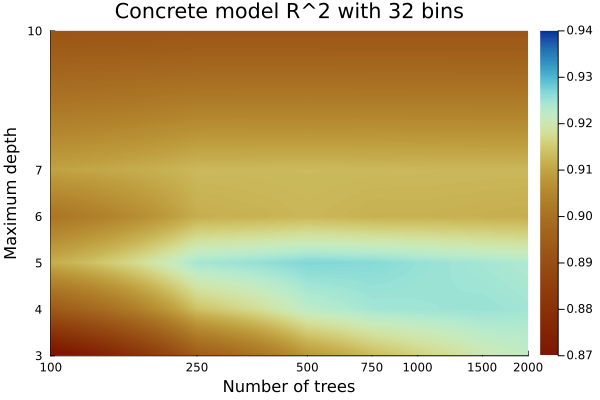

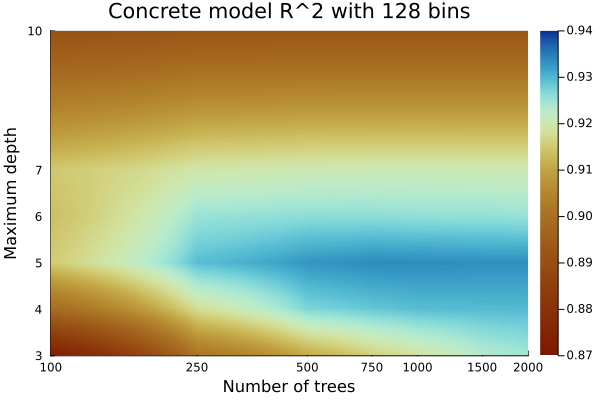

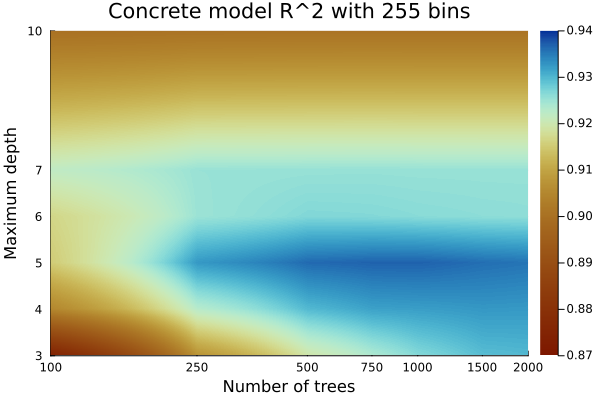

In [15]:
for bin in eachindex(bins)
    display(plot_model_quality(trees, depths, r2_vals[bin]; plot_title="Concrete model R^2 with $(bins[bin]) bins", label_x="Number of trees", label_y="Maximum depth", lim_l=0.87, lim_h=0.94))
end

In [16]:
for bin in eachindex(bins) println(findmax(r2_vals[bin])) end

(0.9161985426844871, CartesianIndex(6, 4))
(0.9269468561609069, CartesianIndex(3, 3))
(0.9337963733485329, CartesianIndex(4, 3))
(0.9369920878094198, CartesianIndex(5, 3))
